# **TECNICATURA UNIVERSITARIA EN INTELIGENCIA ARTIFICIAL**  
## TRABAJO PRÁCTICO N° 3: MINERÍA DE DATOS  
### **INTEGRANTES:** Caballero, Franco - (C-7328/8) | Rosito, Valentin - (R-4662/1)
### **Fecha Límite de Entrega:** 6/06/2025  
### **Semestre:** 1° Semestre 2025


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ejercicio 1: EDA 

**VARIABLES**  

Temperatura → Temperatura diaria registrada (en grados Celsius).  
Humedad → Porcentaje de humedad relativa en el ambiente.  
VientoVelocidad → Velocidad del viento (en km/h).  
Precipitation → Precipitación diaria acumulada (en mm).  
PresionAtmosferica → Presión atmosférica medida (en hPa).  
Localizacion → Ubicación geográfica donde se tomaron las mediciones (Llanura, Montaña, Costa).  
TipoClima → Clasificación climática general del día (Soleado, Lluvioso, Nublado, Nevado).  

**TARGET**
  
Estacion → Estación del año (primavera, verano, otoño, invierno). 

In [24]:
df = pd.read_csv('dxWeather.csv')

In [32]:
df['TipoClima'].value_counts()

TipoClima
Soleado     2867
Lluvioso    2830
Nublado     2790
Nevado      1603
Name: count, dtype: int64

In [25]:
# Observamos de que tipo es cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10090 entries, 0 to 10089
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperatura         10090 non-null  int64  
 1   Humedad             10090 non-null  int64  
 2   VientoVelocidad     10090 non-null  float64
 3   Precipitation       10090 non-null  int64  
 4   PresionAtmosferica  10090 non-null  float64
 5   Localizacion        10090 non-null  object 
 6   TipoClima           10090 non-null  object 
 7   Estacion            10090 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 630.8+ KB


In [26]:
# Podemos ver que no hay valores nulos
df.isnull().sum()

Temperatura           0
Humedad               0
VientoVelocidad       0
Precipitation         0
PresionAtmosferica    0
Localizacion          0
TipoClima             0
Estacion              0
dtype: int64

In [27]:
# Hacemos gráficos y luego sacamos outliers o directamente sacamos outliers asi no vemos el test?

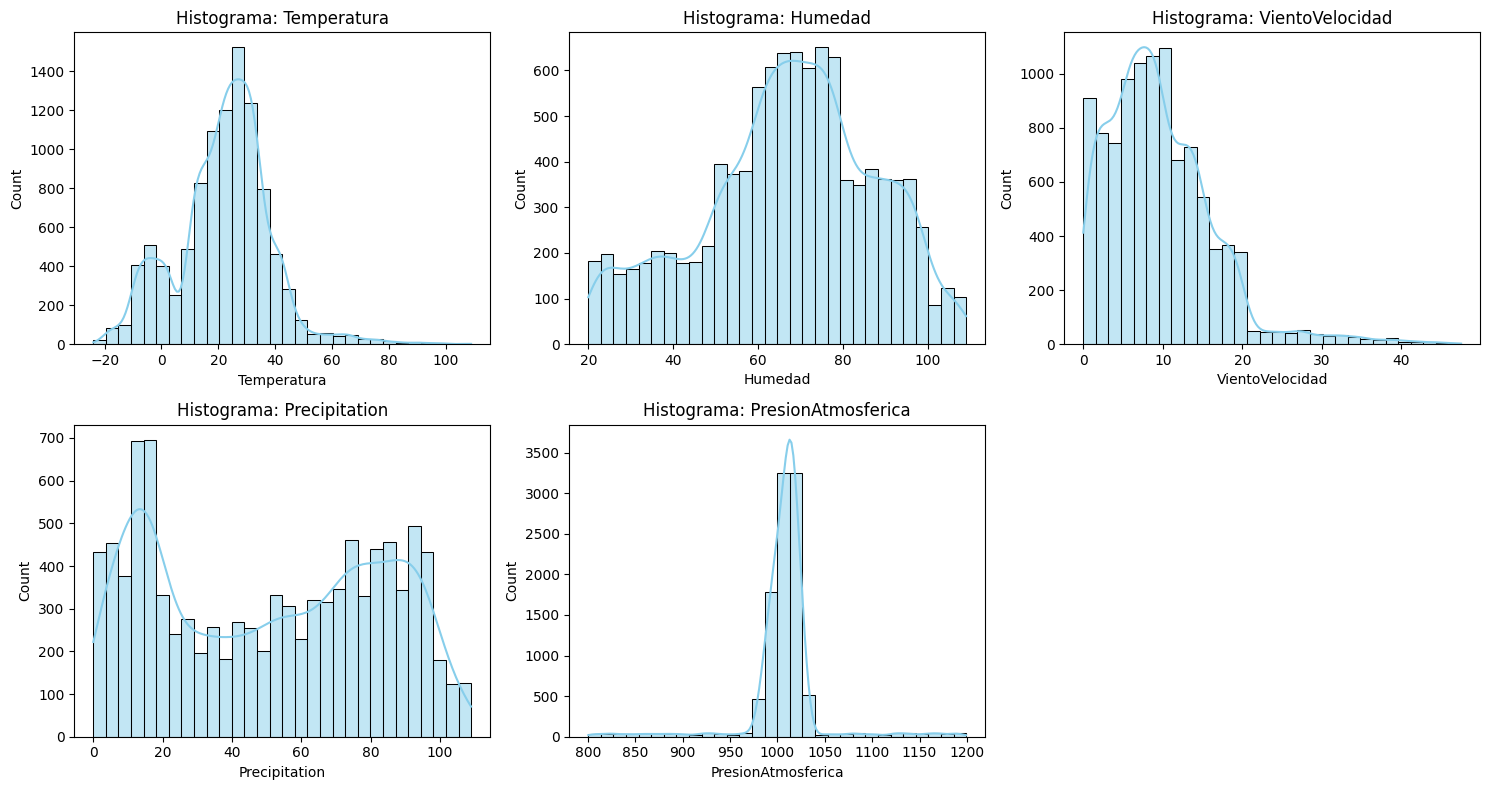

In [28]:
# Hacemos histogramas de las variables numéricas
variables_numericas = ['Temperatura', 'Humedad', 'VientoVelocidad', 'Precipitation', 'PresionAtmosferica']

plt.figure(figsize=(15, 8))
for i, columna in enumerate(variables_numericas):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df, x=columna, kde=True, bins=30, color='skyblue')
    plt.title(f'Histograma: {columna}')
plt.tight_layout()
plt.show()

Se puede observar.... sesgo, uniforme, etc.

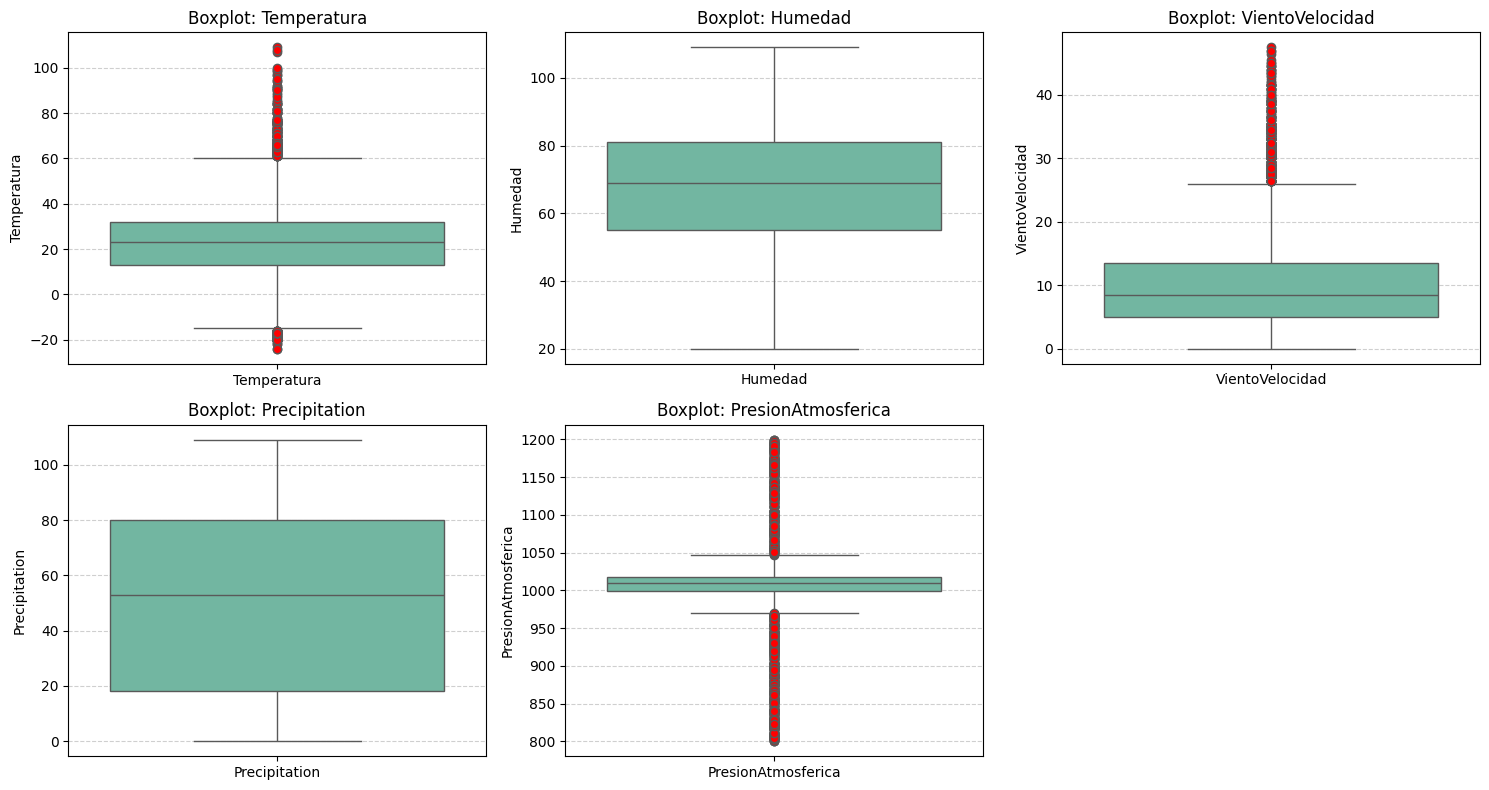

In [29]:
# Crear los subplots
plt.figure(figsize=(15, 8))

for i, columna in enumerate(variables_numericas):
    plt.subplot(2, 3, i + 1)
    
    # Creamos un DataFrame temporal con una columna dummy para evitar el warning
    temp_df = df[[columna]].copy()
    temp_df['Variable'] = columna  # Columna constante, solo para usar como hue
    
    sns.boxplot(
        data=temp_df,
        x='Variable',
        y=columna,
        hue='Variable',
        palette='Set2',
        legend=False,
        flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none')
    )
    
    plt.title(f'Boxplot: {columna}')
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Se pueden observar bastantes outliers en Temperatura, VientoVelocidad y PresionAtmosferica

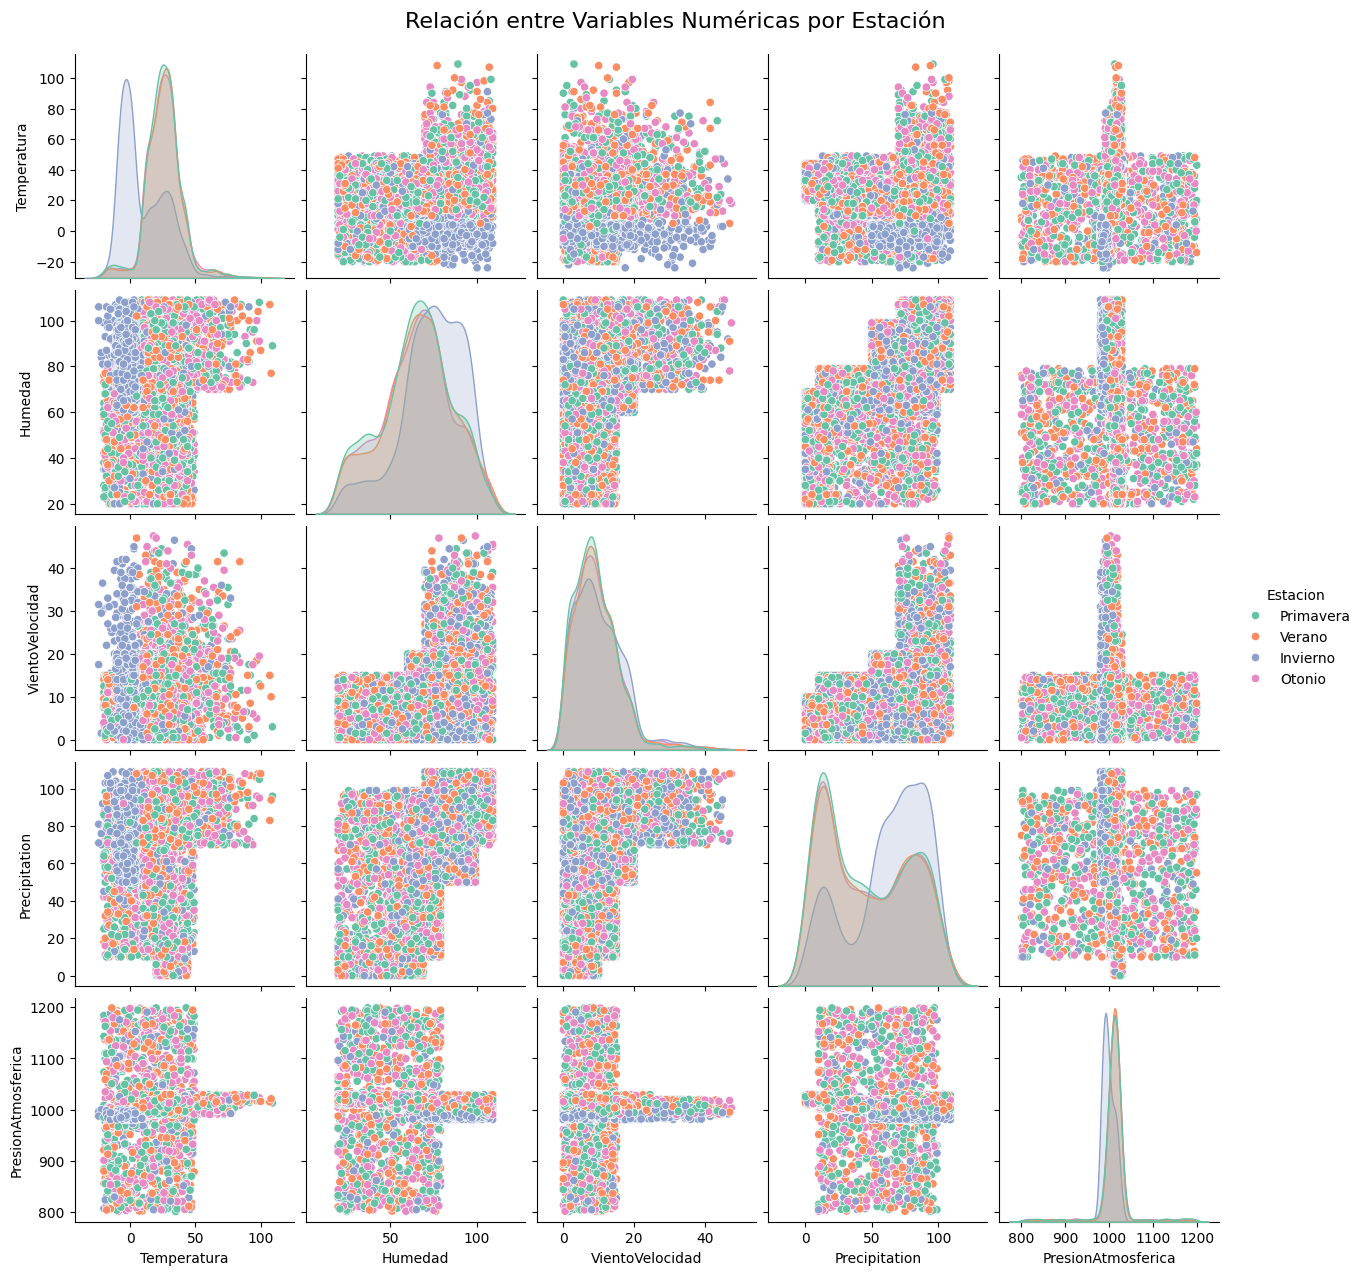

In [34]:
# Pairplot coloreado por Estación
sns.pairplot(df, vars=variables_numericas, hue="Estacion", palette="Set2", diag_kind="kde")
plt.suptitle("Relación entre Variables Numéricas por Estación", y=1.02, fontsize=16)
plt.show()

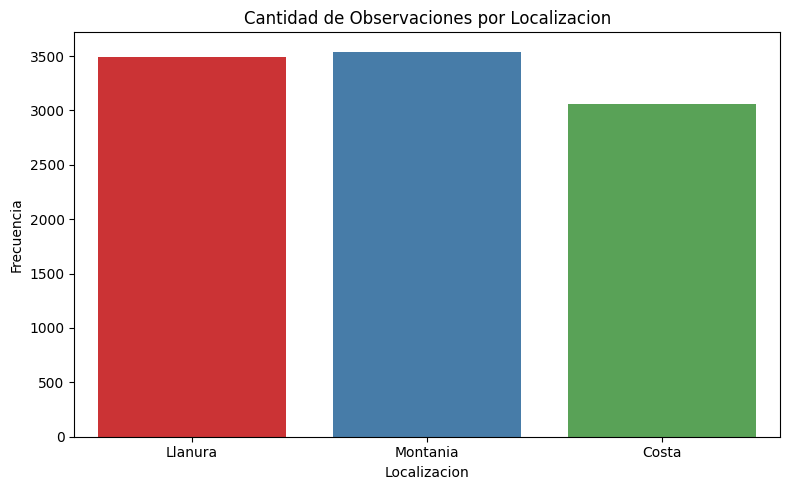

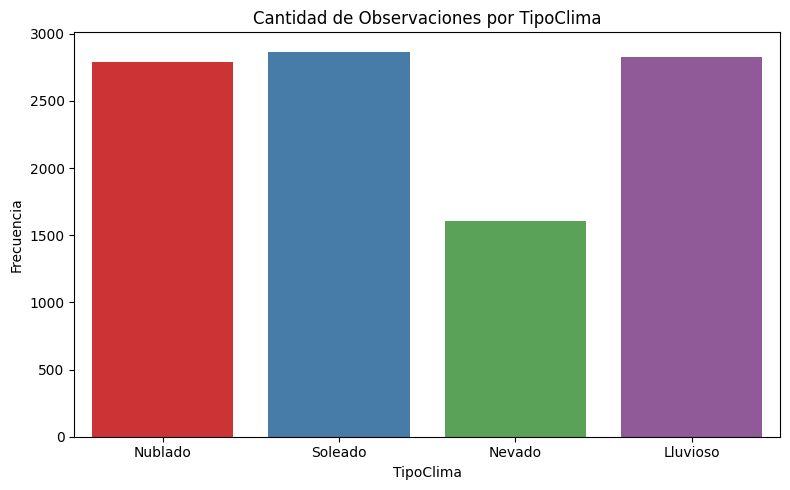

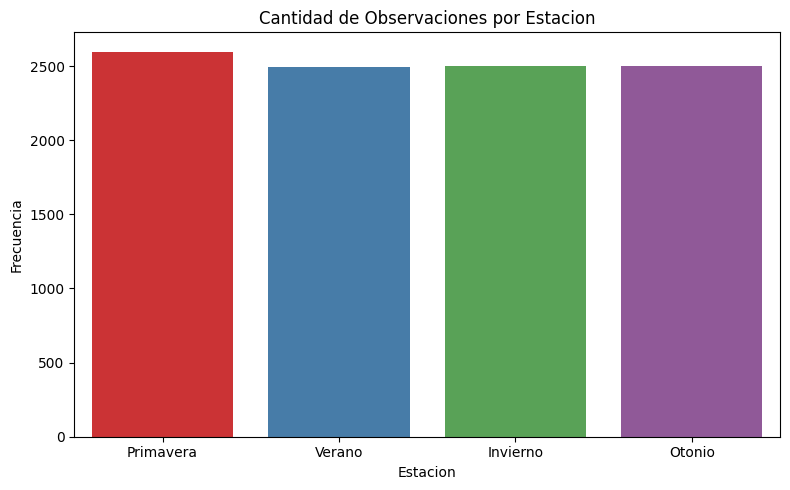

In [30]:
# Lista de variables categóricas
variables_categoricas = ['Localizacion', 'TipoClima', 'Estacion']

# Colores personalizados (opcional, podés usar Set1, Set2, etc.)
palette = 'Set1'

for columna in variables_categoricas:
    plt.figure(figsize=(8, 5))
    sns.countplot(
        data=df,
        x=columna,
        hue=columna,
        palette=palette,
        dodge=False,
        legend=False
    )
    plt.title(f'Cantidad de Observaciones por {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


### Outliers

In [35]:
# Creamos una copia del DataFrame para filtrar outliers
df_filtrado = df.copy()

# Contador total de filas antes
total_filas = df_filtrado.shape[0]

# Creamos un booleano general para marcar filas con outliers
outliers_mask = pd.Series(False, index=df_filtrado.index)

# Detectamos outliers en cada columna numérica con método IQR
for col in variables_numericas:
    Q1 = df_filtrado[col].quantile(0.25)
    Q3 = df_filtrado[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Agregamos a la máscara si hay outliers en esta columna
    outliers_mask |= (df_filtrado[col] < limite_inferior) | (df_filtrado[col] > limite_superior)

# Mostrar porcentaje de outliers detectados
porcentaje_outliers = (outliers_mask.sum() / total_filas) * 100
print(f"Se detectaron {outliers_mask.sum()} filas con outliers ({porcentaje_outliers:.2f}%)")

# Eliminamos las filas con outliers
df_filtrado = df_filtrado[~outliers_mask].reset_index(drop=True)
print(f"Filas restantes después de eliminar outliers: {df_filtrado.shape[0]}")

Se detectaron 1311 filas con outliers (12.99%)
Filas restantes después de eliminar outliers: 8779


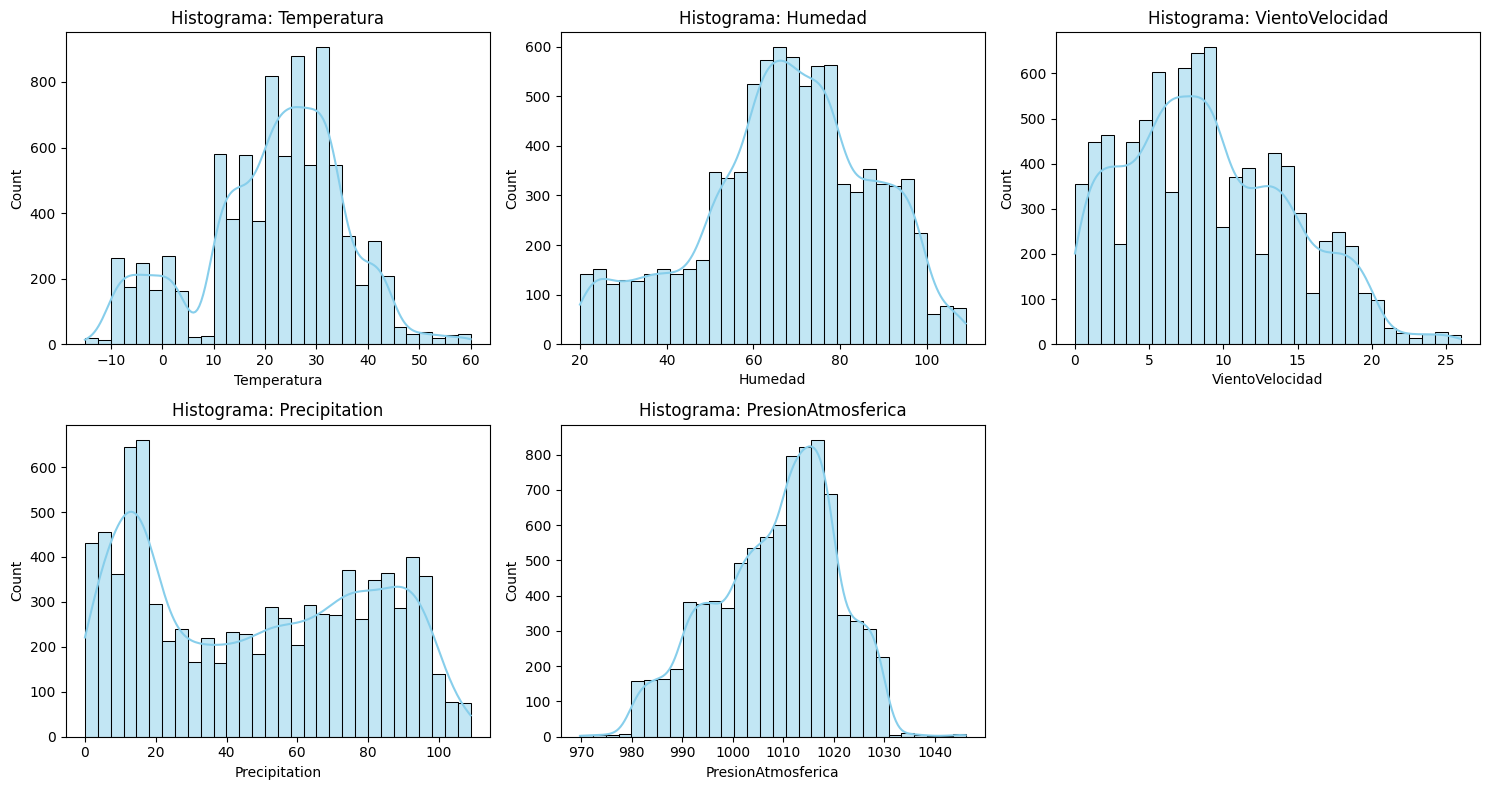

In [36]:
# Vemos como se ven los histogramas de las variables numéricas después de eliminar outliers
plt.figure(figsize=(15, 8))
for i, columna in enumerate(variables_numericas):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df_filtrado, x=columna, kde=True, bins=30, color='skyblue')
    plt.title(f'Histograma: {columna}')
plt.tight_layout()
plt.show()